In [5]:
''''modelo para classificar vinhos'''''

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # Importar o classificador Logistic Regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [6]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
print(X)
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:

logreg = LogisticRegression(random_state=42, max_iter=5000, solver='lbfgs')  # Inicializar a Regressão Logística
logreg.fit(X_train, y_train)



LogisticRegression(max_iter=5000, random_state=42)

In [12]:
y_pred_logreg = logreg.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_logreg))

Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



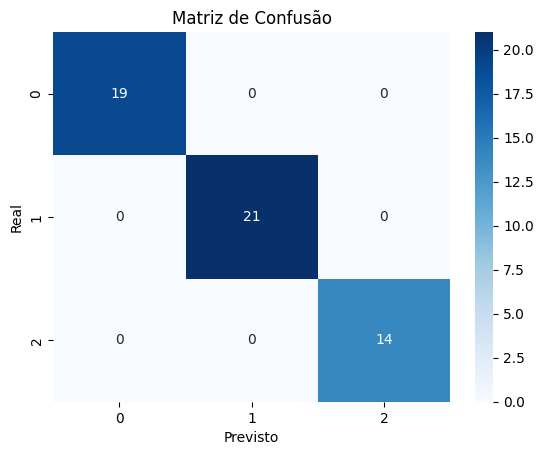

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Acurácia: 0.9333333333333333

Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



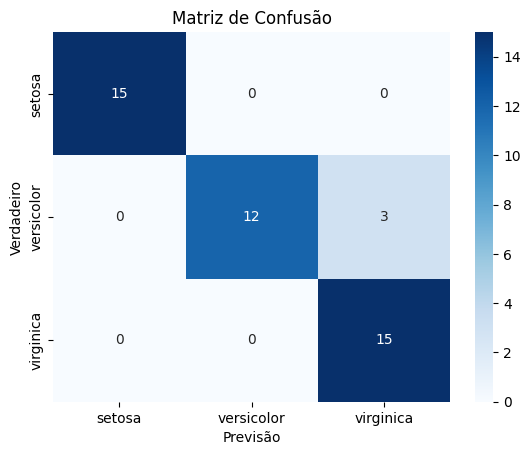

|--- Comprimento da pétala (cm) <= 2.45
|   |--- class: setosa
|--- Comprimento da pétala (cm) >  2.45
|   |--- Largura da pétala (cm) <= 1.55
|   |   |--- Comprimento da pétala (cm) <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- Comprimento da pétala (cm) >  4.95
|   |   |   |--- class: virginica
|   |--- Largura da pétala (cm) >  1.55
|   |   |--- Largura da pétala (cm) <= 1.70
|   |   |   |--- Largura da sépala (cm) <= 2.85
|   |   |   |   |--- class: versicolor
|   |   |   |--- Largura da sépala (cm) >  2.85
|   |   |   |   |--- class: virginica
|   |   |--- Largura da pétala (cm) >  1.70
|   |   |   |--- Comprimento da pétala (cm) <= 4.85
|   |   |   |   |--- Largura da sépala (cm) <= 3.00
|   |   |   |   |   |--- class: virginica
|   |   |   |   |--- Largura da sépala (cm) >  3.00
|   |   |   |   |   |--- class: versicolor
|   |   |   |--- Comprimento da pétala (cm) >  4.85
|   |   |   |   |--- class: virginica

Árvore de Decisão:

|--- Comprimento da pétala (cm) <= 2.45

In [11]:
'''Modelo para classificar flores de iris de acordo com suas caracteristicas fisisica, como comprimento e largura da petula'''

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o dataset
iris = load_iris()
X = iris.data
y = iris.target

# Criar um DataFrame para melhor visualização
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y

# 2. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# O parâmetro 'stratify' do método train_test_split no scikit-learn é usado para garantir que a proporção das classes
# no conjunto de treino e teste seja a mesma da distribuição original dos dados.
# Isso é especialmente importante em problemas de classificação, onde o desbalanceamento entre as classes
# pode afetar a avaliação do modelo.


# 3. Treinar o modelo
clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(X_train, y_train)

# 4. Fazer previsões
y_pred = clf.predict(X_test)

# 5. Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# 6. Visualizar a árvore de decisão

nomes_features = ['Comprimento da sépala (cm)', 
                  'Largura da sépala (cm)', 
                  'Comprimento da pétala (cm)', 
                  'Largura da pétala (cm)']
arvore = export_text(clf, feature_names=nomes_features)

# Substituir os labels numéricos pelas classes reais
for i, nome_classe in enumerate(iris.target_names):
    arvore = arvore.replace(f'class: {i}', f'class: {nome_classe}')

print(arvore)


print("Árvore de Decisão:\n")
print(export_text(clf, feature_names=nomes_features))

# 7. Fazer previsões em novos dados
novos_dados = np.array([[5.1, 3.5, 1.4, 0.2], [6.7, 3.1, 4.7, 1.5], [7.2, 3.6, 6.1, 2.5]])
predicoes = clf.predict(novos_dados)
predicoes_labels = [iris.target_names[label] for label in predicoes]

print("\nNovos dados:", novos_dados)
print("Previsões:", predicoes_labels)


In [14]:
classes = iris.target_names

print("🎮 Bem-vindo ao jogo: Descubra a Flor!")
print("Digite as características da flor:")

# Recebendo entradas do usuário
comprimento_petala = float(input("Comprimento da pétala (cm): "))
largura_petala = float(input("Largura da pétala (cm): "))
comprimento_sepala = float(input("Comprimento da sépala (cm): "))
largura_sepala = float(input("Largura da sépala (cm): "))

# Fazendo a previsão
entrada = [[comprimento_sepala, largura_sepala, comprimento_petala, largura_petala]]
pred = model.predict(entrada)[0]

print(f"\n🌸 Eu acho que essa flor é: **{classes[pred]}**\n")
print(f'\ncomprimento da pentala indicado:{comprimento_petala}\nlargura da petala indicado:{largura_petala}\ncomprimento da sepala indicado:{comprimento_sepala}\nlagura sepala:{largura_sepala}')

🎮 Bem-vindo ao jogo: Descubra a Flor!
Digite as características da flor:

🌸 Eu acho que essa flor é: **versicolor**


comprimento da pentala indicado:3.0
largura da petala indicado:1.2
comprimento da sepala indicado:4.0
lagura sepala:2.0
